### 1. Introduction to SVM

Using SVM to build a classifier for cancer cells.They will be classified as benign(mild) or malignant(evil) state.
The model maps data to a high-dimensional feature space such that the data points can be categorized, even when the data is otherwise linearly seperable(kernel function of SVM classifer does this). Seperator between the categories is found when the data is transformed in such a way that the seperator could be drawn as a hyperplane.

### 2. Necessary imports

In [1]:
#For data manipulation
import pandas as pd
#For mathematical methods
import numpy as np
#For visualization
import matplotlib.pyplot as plt

### 3. About the Cancer data

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbXl5Rll3UnRGejNSV2g1VGJuVmhfdjhKaDFpd3xBQ3Jtc0ttcXBuTGRxRzVKRmpiejZNcXN5TjFmYWJuS2hPV0xkUTdhQ1hXZTRTdFA3X2kxMGEybmNSdDhKVFNQYWNINkdwVHZMWHVidC1lZUZxMVFjbUthUlZpQWpSdTRtOGE3blpYV2NRellJNVpVNTdMOVNPNA&q=http%3A%2F%2Fmlearn.ics.uci.edu%2FMLRepository.html&v=7sz4WpkUIIs] 

Public Source - [https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa3MxVXI5aWNrclJzNDF6Uno5eExFaDJWRlRoQXxBQ3Jtc0tsVHZGTkxPM2pQeTVaY1Rkc3U3QU1WZ2lnZ3N2UWFEY3B2U0doZk0xa05SdWdJZzhsOGZ0YmhFV3ZSOVZWOWpVWEh3Q19fNm5BNWNYU3pqUkdUbFJGS1RxeXNRRUtJVDZTT2paUnprQ3RrdHc4aGZvSQ&q=https%3A%2F%2Fs3-api.us-geo.objectstorage.softlayer.net%2Fcf-courses-data%2FCognitiveClass%2FML0101ENv3%2Flabs%2Fcell_samples.csv&v=7sz4WpkUIIs]

### 4. Load data from CSV

In [2]:
df = pd.read_csv('dataset/cell_samples.csv')

In [3]:
df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
116,1173347,8,3,3,1,2,2,3,2,1,2
270,390840,8,4,7,1,3,10,3,9,2,4
127,1177027,3,1,1,1,2,1,3,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2
362,888169,3,2,2,1,4,3,2,1,1,2


In [4]:
print('Shape: '+str(df.shape))
print('Size: '+str(df.size))
print(df.count())

Shape: (699, 11)
Size: 7689
ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64


In [5]:
print('Class uniques: '+ str(df['Class'].nunique()))
print('Distribution: '+str(df['Class'].value_counts()))

Class uniques: 2
Distribution: Class
2    458
4    241
Name: count, dtype: int64


In [6]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 5. Distribution of the classes

In [7]:
malignant_df = df[df['Class']==4][0:230]
benign_df = df[df['Class']==2][0:230]

In [8]:
help(benign_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

<Axes: xlabel='Clump', ylabel='UnifSize'>

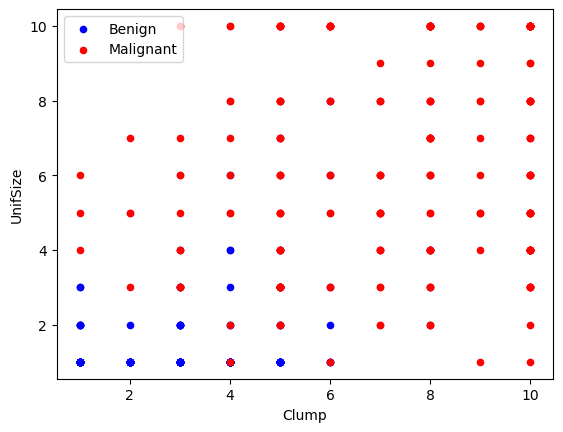

In [9]:
axes = benign_df.plot(kind='scatter', x = 'Clump', y = 'UnifSize', color = 'blue', label = 'Benign')

malignant_df.plot(kind='scatter', x = 'Clump', y = 'UnifSize', color = 'red', label = 'Malignant', ax = axes)

### 6.Identifying unwanted rows

In [10]:
df.dtypes

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

In [11]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### 7. Remove unwanted columns

In [15]:
#renaming one of the rows
df.rename(columns = {"Class":"ClassCategory"}, inplace=True)

In [13]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [16]:
df.columns
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# df has 100 rows and 11 columns,
# picked 9 columns out of the 11 
#X then is the independent variable
X = np.asarray(feature_df)
#y is the dependent variable as it is the output based on fn of X
y=np.asarray(df['ClassCategory'])

print(X[0:10])
print(y[0:10])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]
 [ 8 10 10  8  7 10  9  7  1]
 [ 1  1  1  1  2 10  3  1  1]
 [ 2  1  2  1  2  1  3  1  1]
 [ 2  1  1  1  2  1  1  1  5]
 [ 4  2  1  1  2  1  2  1  1]]
[2 2 2 2 2 4 2 2 2 2]


### 8. Divide data as Train/Test dataset

In [17]:
'''
df --> Train(80 rows)/Test(20 rows)
Train(X,y) ## X - 2D array, y is 1D
Test(X,y)
'''
#caps is multi-dimensional data, y is 1D
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# 546*9
X_train.shape
# 546*1
y_train.shape

#137*9
X_test.shape

#137*1
y_test.shape

(137,)

### 9. Modelling (SVM with Scikit-learn)

In [19]:
from sklearn import svm
#support vector classifier (data points near hyperplane :
#whose distance(perpendicualr to the hyperplane) nearby points and maximize the distance)
#kernel - visualizes data from different perspective
classifier = svm.SVC(kernel ='linear', gamma = 'auto', C=2) #polynomial, radial basis function, sigmoid kernels

classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

y_predicted

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

### 10. Model Evaluation

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

